#  Fitting Spectrum

This notebook shows the aplication of fitting code to a 5-component spectrum 


In [1]:
import matplotlib.pylab as plt
import scipy.optimize as sop
import tables as tb
import pandas as pd
from Histogram import Histogram as hist
from PDF import PDF
import numpy as np
from Fits import Fit
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"]          = 32, 24
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

N_{isotope}_{volume}

In [2]:
N_0_0 = 1500
N_1_0 = 1300
N_2_0 = 2000
N_0_1 = 3500
N_1_1 = 2700
N_2_1 = 3000

N_0_0p = np.random.poisson(N_0_0)
N_0_1p = np.random.poisson(N_0_1)
N_1_0p = np.random.poisson(N_1_0)
N_1_1p = np.random.poisson(N_1_1)
N_2_0p = np.random.poisson(N_2_0)
N_2_1p = np.random.poisson(N_2_1)

In [3]:
Nsim = 1000*1000

D_0_0_e_pdf = np.random.exponential(200,   Nsim)
D_0_0_z_pdf = np.random.normal     (30, 9, Nsim)

D_0_1_e_pdf = np.random.exponential(200,    Nsim)
D_0_1_z_pdf = np.random.normal     (90, 25, Nsim)

D_1_0_e_pdf = np.random.rayleigh   (500,    Nsim)
D_1_0_z_pdf = np.random.normal     (30, 9,  Nsim)

D_1_1_e_pdf = np.random.rayleigh   (500,    Nsim)
D_1_1_z_pdf = np.random.normal     (90, 25, Nsim)

D_2_0_e_pdf = np.random.chisquare  (1500,   Nsim)
D_2_0_z_pdf = np.random.normal     (30, 9,  Nsim)

D_2_1_e_pdf = np.random.chisquare  (1500,   Nsim)
D_2_1_z_pdf = np.random.normal     (90, 25, Nsim)

In [4]:

D_0_0_e = np.random.exponential(200,   N_0_0p)
D_0_0_z = np.random.normal     (30, 9, N_0_0p)

D_0_1_e = np.random.exponential(200,    N_0_1p)
D_0_1_z = np.random.normal     (90, 25, N_0_1p)

D_1_0_e = np.random.rayleigh   (500,    N_1_0p)
D_1_0_z = np.random.normal     (30, 9,  N_1_0p)

D_1_1_e = np.random.rayleigh   (500,    N_1_1p)
D_1_1_z = np.random.normal     (90, 25, N_1_1p)

D_2_0_e = np.random.chisquare  (1500,   N_2_0p)
D_2_0_z = np.random.normal     (30, 9,  N_2_0p)

D_2_1_e = np.random.chisquare  (1500,   N_2_1p)
D_2_1_z = np.random.normal     (90, 25, N_2_1p)


In [5]:
nbin = 150
minE, maxE = 0, 2000
minZ, maxZ = 0, 150


h_0_0_e = hist(D_0_0_e, nbin, minE, maxE)
h_0_0_z = hist(D_0_0_z, nbin, minZ, maxZ)
h_0_1_e = hist(D_0_1_e, nbin, minE, maxE)
h_0_1_z = hist(D_0_1_z, nbin, minZ, maxZ)
h_1_0_e = hist(D_1_0_e, nbin, minE, maxE)
h_1_0_z = hist(D_1_0_z, nbin, minZ, maxZ)
h_1_1_e = hist(D_1_1_e, nbin, minE, maxE)
h_1_1_z = hist(D_1_1_z, nbin, minZ, maxZ)
h_2_0_e = hist(D_2_0_e, nbin, minE, maxE)
h_2_0_z = hist(D_2_0_z, nbin, minZ, maxZ)
h_2_1_e = hist(D_2_1_e, nbin, minE, maxE)
h_2_1_z = hist(D_2_1_z, nbin, minZ, maxZ)

h_0_0_e_pdf = hist(D_0_0_e_pdf, nbin, minE, maxE)
h_0_0_z_pdf = hist(D_0_0_z_pdf, nbin, minZ, maxZ)
h_0_1_e_pdf = hist(D_0_1_e_pdf, nbin, minE, maxE)
h_0_1_z_pdf = hist(D_0_1_z_pdf, nbin, minZ, maxZ)
h_1_0_e_pdf = hist(D_1_0_e_pdf, nbin, minE, maxE)
h_1_0_z_pdf = hist(D_1_0_z_pdf, nbin, minZ, maxZ)
h_1_1_e_pdf = hist(D_1_1_e_pdf, nbin, minE, maxE)
h_1_1_z_pdf = hist(D_1_1_z_pdf, nbin, minZ, maxZ)
h_2_0_e_pdf = hist(D_2_0_e_pdf, nbin, minE, maxE)
h_2_0_z_pdf = hist(D_2_0_z_pdf, nbin, minZ, maxZ)
h_2_1_e_pdf = hist(D_2_1_e_pdf, nbin, minE, maxE)
h_2_1_z_pdf = hist(D_2_1_z_pdf, nbin, minZ, maxZ)


h_total_e = hist(np.concatenate([D_0_0_e, D_0_1_e, D_1_0_e, D_1_1_e, D_2_0_e, D_2_1_e]), nbin, minE, maxE)
h_total_z = hist(np.concatenate([D_0_0_z, D_0_1_z, D_1_0_z, D_1_1_z, D_2_0_z, D_2_1_z]), nbin, minZ, maxZ)

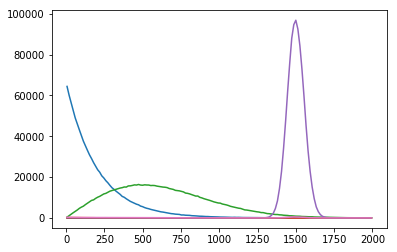

In [6]:
plt.plot(h_0_0_e.bins, h_0_0_e_pdf.hist)
plt.plot(h_0_1_e.bins, h_0_1_e.hist)
plt.plot(h_1_0_e.bins, h_1_0_e_pdf.hist)
plt.plot(h_1_1_e.bins, h_1_1_e.hist)
plt.plot(h_2_0_e.bins, h_2_0_e_pdf.hist)
plt.plot(h_2_1_e.bins, h_2_1_e.hist)
plt.plot(h_total_e.bins, h_total_e.hist)

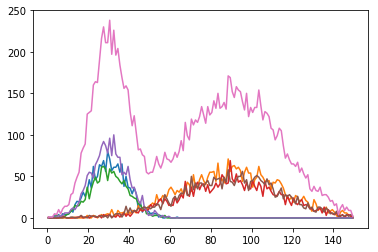

In [7]:
plt.plot(h_0_0_z.bins, h_0_0_z.hist)
plt.plot(h_0_1_z.bins, h_0_1_z.hist)
plt.plot(h_1_0_z.bins, h_1_0_z.hist)
plt.plot(h_1_1_z.bins, h_1_1_z.hist)
plt.plot(h_2_0_z.bins, h_2_0_z.hist)
plt.plot(h_2_1_z.bins, h_2_1_z.hist)
plt.plot(h_total_z.bins, h_total_z.hist)


In [8]:
interpol = 'cubic'


pdf_0_0_e  = PDF(h_0_0_e_pdf, interpolation=interpol)
pdf_0_0_z  = PDF(h_0_0_z_pdf, interpolation=interpol)
pdf_0_1_e  = PDF(h_0_1_e_pdf, interpolation=interpol)
pdf_0_1_z  = PDF(h_0_1_z_pdf, interpolation=interpol)
pdf_1_0_e  = PDF(h_1_0_e_pdf, interpolation=interpol)
pdf_1_0_z  = PDF(h_1_0_z_pdf, interpolation=interpol)
pdf_1_1_e  = PDF(h_1_1_e_pdf, interpolation=interpol)
pdf_1_1_z  = PDF(h_1_1_z_pdf, interpolation=interpol)
pdf_2_0_e  = PDF(h_2_0_e_pdf, interpolation=interpol)
pdf_2_0_z  = PDF(h_2_0_z_pdf, interpolation=interpol)
pdf_2_1_e  = PDF(h_2_1_e_pdf, interpolation=interpol)
pdf_2_1_z  = PDF(h_2_1_z_pdf, interpolation=interpol)


pdf_list_e = [pdf_0_0_e, pdf_0_1_e, pdf_1_0_e, pdf_1_1_e, pdf_2_0_e, pdf_2_1_e]
pdf_list_z = [pdf_0_0_z, pdf_0_1_z, pdf_1_0_z, pdf_1_1_z, pdf_2_0_z, pdf_2_1_z]

In [9]:
x_dict = {'E': h_0_0_e.bins , 'z': h_0_0_z.bins}
totals = {'E': h_total_e    , 'z': h_total_z   }
pdfs   = {'E': pdf_list_e   , 'z': pdf_list_z  }
N_0s   = np.array([N_0_0, N_0_1, N_1_0, N_1_1, N_2_0, N_2_1])

In [10]:
#Fit initialization
fit = Fit(x_dict, totals, pdfs, N_0s)

In [48]:
ratios = np.ones(6)

%time res_ll = fit.FitLLM(ratios,tol=1e-12,options={"maxiter":10000,'ftol':1e-20}, bounds=[[0.1,10],[0.1,10],[0.1,10],[0.1,10],[0.1,10],[0.1,10]])
print(res_ll)

CPU times: user 3.79 s, sys: 18.3 ms, total: 3.8 s
Wall time: 3.84 s
    chi2: array([5.37662014e+01, 2.43271744e-31])
     err: array([-1.00847222,  0.43204279,  2.4498394 ,  1.44060454,  2.09904177,
       -1.39900071])
     fun: 1968.542736454638
     jac: array([ 0.29822331, -0.44183253, -0.23160283,  0.73043793, -0.34083314,
        0.26955149])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 139
     nit: 25
  status: 1
 success: True
       x: array([1.02164694, 1.02958153, 0.97397971, 0.98765623, 1.00536053,
       0.95733033])


In [49]:
res_ll.x

array([1.02164694, 1.02958153, 0.97397971, 0.98765623, 1.00536053,
       0.95733033])

In [50]:
result  = res_ll.x
factors = res_ll.x * N_0s

interpol = 'nearest'

pdf_0_0_ep  = PDF(h_0_0_e_pdf, factor=factors[0]  ,interpolation=interpol)
pdf_0_1_ep  = PDF(h_0_1_e_pdf, factor=factors[1]  ,interpolation=interpol)
pdf_1_0_ep  = PDF(h_1_0_e_pdf, factor=factors[2]  ,interpolation=interpol)
pdf_1_1_ep  = PDF(h_1_1_e_pdf, factor=factors[3]  ,interpolation=interpol)
pdf_2_0_ep  = PDF(h_2_0_e_pdf, factor=factors[4]  ,interpolation=interpol)
pdf_2_1_ep  = PDF(h_2_1_e_pdf, factor=factors[5]  ,interpolation=interpol)

pdf_0_0_zp  = PDF(h_0_0_z_pdf, factor=factors[0]  ,interpolation=interpol)
pdf_0_1_zp  = PDF(h_0_1_z_pdf, factor=factors[1]  ,interpolation=interpol)
pdf_1_0_zp  = PDF(h_1_0_z_pdf, factor=factors[2]  ,interpolation=interpol)
pdf_1_1_zp  = PDF(h_1_1_z_pdf, factor=factors[3]  ,interpolation=interpol)
pdf_2_0_zp  = PDF(h_2_0_z_pdf, factor=factors[4]  ,interpolation=interpol)
pdf_2_1_zp  = PDF(h_2_1_z_pdf, factor=factors[5]  ,interpolation=interpol)


In [51]:
Ep = np.linspace(h_0_0_e.bins[0],h_0_0_e.bins[-1],1000)
Zp = np.linspace(h_0_0_z.bins[0],h_0_0_z.bins[-1],1000)

y_0_0_e = pdf_0_0_ep.pdf(Ep)
y_0_1_e = pdf_0_1_ep.pdf(Ep)
y_1_0_e = pdf_1_0_ep.pdf(Ep)
y_1_1_e = pdf_1_1_ep.pdf(Ep)
y_2_0_e = pdf_2_0_ep.pdf(Ep)
y_2_1_e = pdf_2_1_ep.pdf(Ep)

y_0_0_z = pdf_0_0_zp.pdf(Zp)
y_0_1_z = pdf_0_1_zp.pdf(Zp)
y_1_0_z = pdf_1_0_zp.pdf(Zp)
y_1_1_z = pdf_1_1_zp.pdf(Zp)
y_2_0_z = pdf_2_0_zp.pdf(Zp)
y_2_1_z = pdf_2_1_zp.pdf(Zp)


fittotal_e = y_0_0_e + y_0_1_e + y_1_0_e + y_1_1_e + y_2_0_e + y_2_1_e
fittotal_z = y_0_0_z + y_0_1_z + y_1_0_z + y_1_1_z + y_2_0_z + y_2_1_z

fit_0_a_e = y_0_0_e + y_0_1_e 
fit_1_a_e = y_1_0_e + y_1_1_e 
fit_2_a_e = y_2_0_e + y_2_1_e 

fit_a_0_z = y_0_0_z + y_1_0_z + y_2_0_z 
fit_a_1_z = y_0_1_z + y_1_1_z + y_2_1_z 


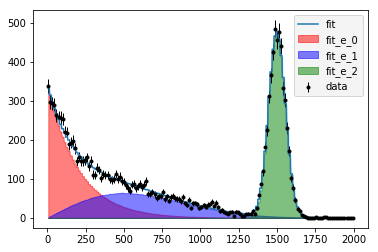

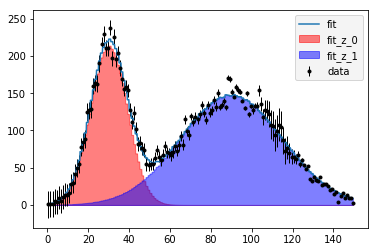

In [52]:
alfa= 0.5
#plt.semilogy()
#plt.ylim(1e-1,2e5)

plt.figure()
plt.errorbar(h_total_e.bins, h_total_e.hist, yerr=np.sqrt(h_total_e.hist),
             marker='.', elinewidth=1, linewidth=0,label='data',color='black')

plt.plot(Ep, fittotal_e,label='fit')

plt.fill_between(Ep, 0 , fit_0_a_e, label='fit_e_0',alpha=alfa,color='r')
plt.fill_between(Ep, 0 , fit_1_a_e, label='fit_e_1',alpha=alfa,color='b')
plt.fill_between(Ep, 0 , fit_2_a_e, label='fit_e_2',alpha=alfa,color='g')

plt.legend().get_frame().set_facecolor('0.95')


plt.figure()
plt.errorbar(h_total_z.bins, h_total_z.hist, yerr=np.sqrt(h_total_e.hist),
             marker='.', elinewidth=1, linewidth=0,label='data',color='black')

plt.plot(Zp, fittotal_z,label='fit')

plt.fill_between(Zp, 0 , fit_a_0_z, label='fit_z_0',alpha=alfa,color='r')
plt.fill_between(Zp, 0 , fit_a_1_z, label='fit_z_1',alpha=alfa,color='b')

plt.legend().get_frame().set_facecolor('0.95')


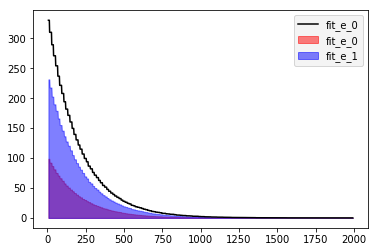

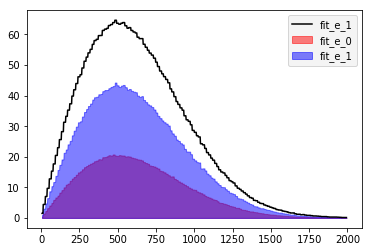

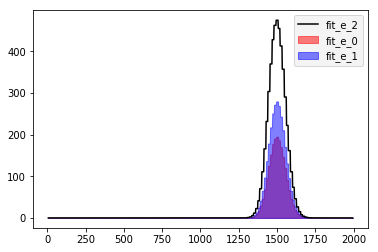

In [53]:
plt.figure()

plt.plot(Ep, fit_0_a_e,label='fit_e_0', color='black')
plt.fill_between(Ep, 0 , y_0_0_e, label='fit_e_0',alpha=alfa,color='r')
plt.fill_between(Ep, 0 , y_0_1_e, label='fit_e_1',alpha=alfa,color='b')
plt.legend().get_frame().set_facecolor('0.95')

plt.figure()

plt.plot(Ep, fit_1_a_e,label='fit_e_1', color='black')
plt.fill_between(Ep, 0 , y_1_0_e, label='fit_e_0',alpha=alfa,color='r')
plt.fill_between(Ep, 0 , y_1_1_e, label='fit_e_1',alpha=alfa,color='b')
plt.legend().get_frame().set_facecolor('0.95')

plt.figure()

plt.plot(Ep, fit_2_a_e,label='fit_e_2', color='black')
plt.fill_between(Ep, 0 , y_2_0_e, label='fit_e_0',alpha=alfa,color='r')
plt.fill_between(Ep, 0 , y_2_1_e, label='fit_e_1',alpha=alfa,color='b')
plt.legend().get_frame().set_facecolor('0.95')


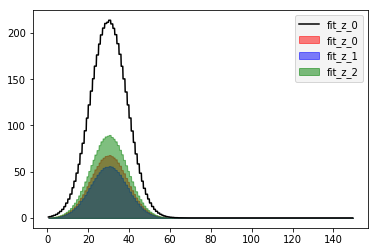

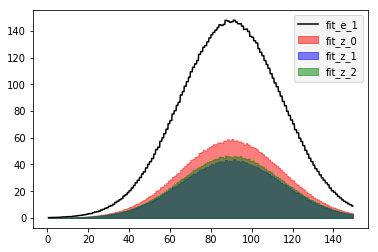

In [54]:
plt.figure()

plt.plot(Zp, fit_a_0_z,label='fit_z_0', color='black')
plt.fill_between(Zp, 0 , y_0_0_z, label='fit_z_0',alpha=alfa,color='r')
plt.fill_between(Zp, 0 , y_1_0_z, label='fit_z_1',alpha=alfa,color='b')
plt.fill_between(Zp, 0 , y_2_0_z, label='fit_z_2',alpha=alfa,color='g')
plt.legend().get_frame().set_facecolor('0.95')

plt.figure()

plt.plot(Zp, fit_a_1_z,label='fit_e_1', color='black')
plt.fill_between(Zp, 0 , y_0_1_z, label='fit_z_0',alpha=alfa,color='r')
plt.fill_between(Zp, 0 , y_1_1_z, label='fit_z_1',alpha=alfa,color='b')
plt.fill_between(Zp, 0 , y_2_1_z, label='fit_z_2',alpha=alfa,color='g')
plt.legend().get_frame().set_facecolor('0.95')


In [55]:
res_ll.hess_inv.dot()

AttributeError: hess_inv